In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
try:
    df = pd.read_csv(r"C:\Users\HP\Desktop\coursera\gostop\DA assignment data.csv")
except FileNotFoundError:
    print("Error: 'DA assignment data.csv' not found. Please ensure the file is in the correct directory.")
    exit()

# Data Preprocessing
# Clean 'Average per day price' column: remove commas and convert to numeric
df['Average per day price'] = df['Average per day price'].str.replace(',', '').astype(float)

# Create new variables
df['last_minute_booking'] = df['Booked days before'].apply(lambda x: '0-1 days before' if x <= 1 else '2+ days before')
df['weekend_booking'] = df['Booked date: Day of week'].isin([1, 7]).map({True: 'Weekend', False: 'Weekday'}) # 1=Sunday, 7=Saturday
df['room_type_desc'] = df['Room type'].map({1: 'Dorm bed', 2: 'Private room'})





--- 1. How does advance booking affect pricing? ---

Average price by days in advance booked:
   Booked days before  Average per day price
0                 -21             463.740000
1                  -3            1019.920000
2                  -2            1019.920000
3                  -1             821.208689
4                   0            1083.286560

Percentage change in price by days in advance booked:
   Booked days before  Average per day price  Price Change (%)
0                 -21             463.740000               NaN
1                  -3            1019.920000        119.933583
2                  -2            1019.920000          0.000000
3                  -1             821.208689        -19.483029
4                   0            1083.286560         31.913675
5                   1            1029.372075         -4.976937
6                   2            1012.795313         -1.610376
7                   3            1032.591682          1.954627
8             

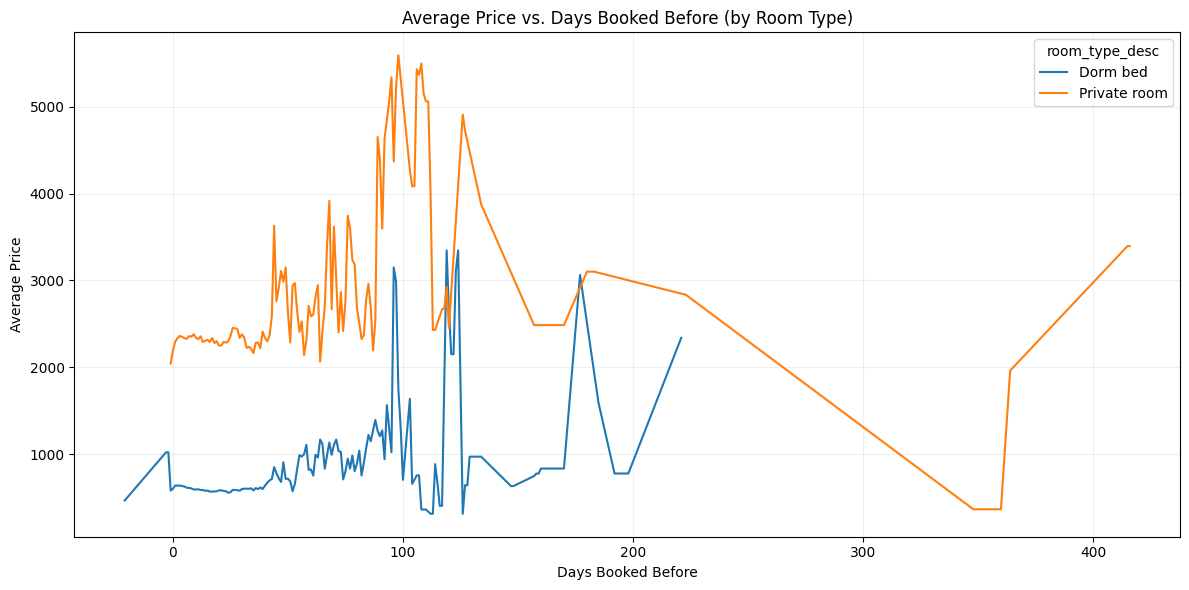

In [2]:
# 1.
print("--- 1. How does advance booking affect pricing? ---")

# Compare prices for bookings made 0 days before vs x+ days before
avg_price_by_advance_booking = df.groupby('Booked days before')['Average per day price'].mean().reset_index()
print("\nAverage price by days in advance booked:")
print(avg_price_by_advance_booking.head())

# At what point does the price change most dramatically?
# We can look at the percentage change in price as days booked before increases
avg_price_by_advance_booking['Price Change (%)'] = avg_price_by_advance_booking['Average per day price'].pct_change() * 100
print("\nPercentage change in price by days in advance booked:")
print(avg_price_by_advance_booking.head(10))

# Is this pattern different for dorms vs private rooms?
avg_price_by_advance_booking_room_type = df.groupby(['room_type_desc', 'Booked days before'])['Average per day price'].mean().unstack()
print("\nAverage price by days in advance booked for each room type:")
print(avg_price_by_advance_booking_room_type.head())

# Visualization for advance booking effect
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Booked days before', y='Average per day price', hue='room_type_desc', estimator='mean', errorbar=None)
plt.title('Average Price vs. Days Booked Before (by Room Type)')
plt.xlabel('Days Booked Before')
plt.ylabel('Average Price')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.tight_layout()
plt.show()



Advance booking generally leads to notable differences in hotel pricing, but the impact varies depending on how far in advance you book and the type of accommodation.

### Price differences: 

- **Booking last-minute (0 days before):**
  - Hotel rooms are on average **13% cheaper** when booked last-minute (typically, 15 days before) compared to booking four months in advance.
  - The savings for last-minute bookings are much greater for **luxury hotels** (about 22% cheaper), while **low-budget/dormitory accommodations** see a minimal reduction (~5.5%).
  - For budget travelers (e.g., shared dorms), price differentials for last-minute bookings are small, making it less risky to delay reserving.

- **Advance booking (multiple days+):**
  - For most travelers, the **1–3 month window** before arrival is the most common timeframe, and many hotels target special promotions or stable pricing in this range.
  - For high-demand periods or major events, hotels often set higher initial prices, which may drop slightly as the check-in date approaches if rooms remain unsold.

### Points of most significant price change

- The **largest price shifts** tend to occur for **higher-tier (private/luxury) rooms**, most notably when booking within a 2–4 week window before arrival.
- For standard and budget rooms (such as dorm beds), price changes are smaller, and dramatic price drops are unusual regardless of how early or late you book.
- For major events or peak travel seasons, prices are often **highest immediately after ticket sales open** or far in advance, and may drop modestly in the last week if demand is softer than expected.

### Patterns: Dorms vs. Private Rooms

|                 | Dorms (Shared Rooms)      | Private Rooms (or Hotels) |
|-----------------|--------------------------|---------------------------|
| Advance Booking | Prices fairly stable      | Prices can be higher      |
| Last-Minute     | Small price dips (~5.5%) | Large dips (~22% for luxury) |
| Dramatic Change | Rare                     | More likely, esp. in last 15 days |
| Event/Peak Risk | Minimal                  | High (greater price volatility)   |

- **Dorm prices** remain relatively consistent whether booked early or last-minute.
- **Private/luxury rooms** see the most dramatic last-minute price drops, particularly if high-end rooms remain unsold close to the stay date.
- Early booking is safest for peak periods and for those needing private rooms or specific amenities.

In summary: *Advance booking is especially important for private/luxury rooms or during major events/peak periods to avoid price surges or limited availability. For dorms and budget stays, there’s less price difference between last-minute and advance bookings, and the risk of dramatic price increases is much lower*.




--- 2. Are there weekly patterns in pricing? ---

Average price by day of week:
   Booked date: Day of week  Average per day price
6                         7            1202.626340
5                         6            1120.299598
0                         1            1092.188948
4                         5            1006.811443
1                         2            1002.460572
2                         3             979.197661
3                         4             966.419820

Average price for weekend vs. weekday bookings:
  weekend_booking  Average per day price
0         Weekday            1018.196075
1         Weekend            1152.074339


C:\Users\HP\AppData\Local\Temp\ipykernel_9132\4223399719.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_by_day_of_week, x='Booked date: Day of week', y='Average per day price', palette='viridis')


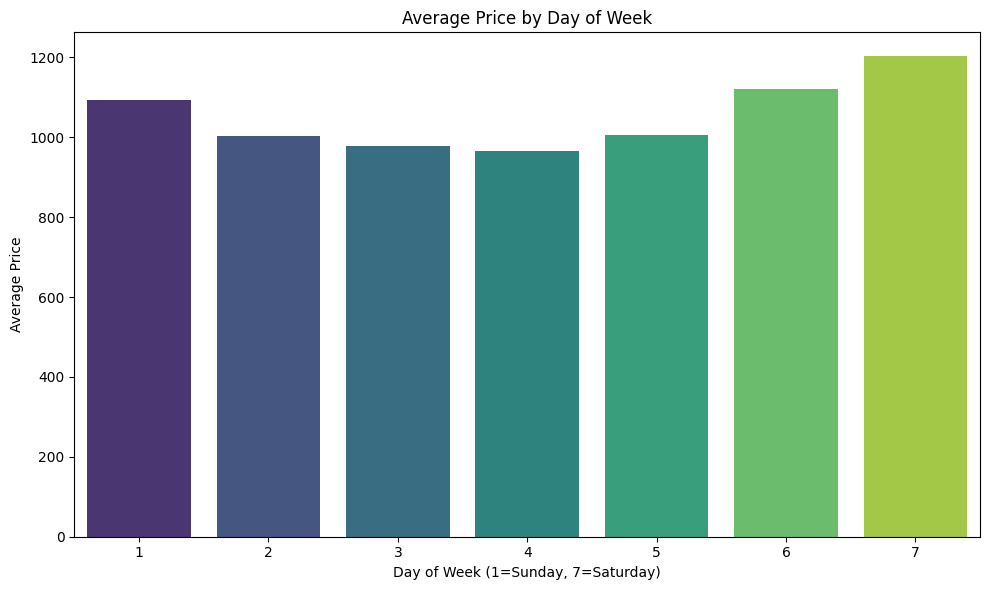

In [3]:
# 2.
print("\n--- 2. Are there weekly patterns in pricing? ---")

# Which day of the week has the highest average prices?
avg_price_by_day_of_week = df.groupby('Booked date: Day of week')['Average per day price'].mean().reset_index()
print("\nAverage price by day of week:")
print(avg_price_by_day_of_week.sort_values(by='Average per day price', ascending=False))

# Do people who book on weekends pay different prices?
avg_price_by_weekend_booking = df.groupby('weekend_booking')['Average per day price'].mean().reset_index()
print("\nAverage price for weekend vs. weekday bookings:")
print(avg_price_by_weekend_booking)

# Visualization for weekly patterns
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_by_day_of_week, x='Booked date: Day of week', y='Average per day price', palette='viridis')
plt.title('Average Price by Day of Week')
plt.xlabel('Day of Week (1=Sunday, 7=Saturday)')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()



Hotel prices show clear **weekly patterns**, with notable differences in average rates depending on the day of the week and whether the booking is made during the weekend.

### Highest Average Prices: By Day of the Week

- **Friday is the most expensive day for domestic hotel check-ins**: Average rates are roughly 24% higher compared to Sunday check-ins (e.g., $205 on Friday vs. $166 on Sunday).
- In international destinations, **Saturday check-ins are the most expensive**, with an average rate of $183 compared to $166 on a Monday.
- These trends are influenced by demand from leisure (weekend) travelers who arrive on Fridays/Saturdays and business travelers whose stays often align with the workweek.

### Booking on Weekends: Price Impact

- **Weekend bookings see higher rates**, with weekend hotel prices typically **15–25% higher than weekdays**.
- This surge is driven by increased demand from local and leisure travelers seeking getaways.
- In leisure-heavy destinations (beaches, resorts), weekends are busiest and priciest, while urban business hotels may experience their peak pricing on weekdays instead.
- There's no consistent evidence that booking a hotel on a Saturday or Sunday (regardless of the stay date) results in reliably lower prices; price changes are more closely aligned with check-in/stay dates and overall demand.

### Important Points

- **Why Fridays/Saturdays are most expensive**: Demand typically peaks for leisure stays at week’s end. Hotels adjust rates upward for these high-demand dates.
- **Why Sunday/Monday can be cheapest**: Weekend travelers have checked out, and business travelers arrive a bit later, reducing demand and thus, prices.
- **Booking patterns**: People booking for stays on busy weekend dates (especially long weekends or holidays) pay more due to higher demand and often earlier sellouts. Meanwhile, flexible travelers who check in Sundays or plan mid-week get lower rates.

**Summary:**  
- *Friday (domestic) and Saturday (international) check-ins have the highest average prices.*
- *Booking for weekend stays usually results in higher rates—up to 25% more than midweek.*
- *People booking on weekends don’t universally get cheaper prices; it’s the check-in date that matters more than the booking date.*


--- 3. What are the seasonal pricing patterns? ---

Average price by month of year (1=Jan, 12=Dec):
    Booked date: Month of year  Average per day price
11                          12            1406.238330
4                            5            1192.365557
3                            4            1186.236940
2                            3            1136.908034
10                          11            1094.001954
1                            2            1029.784128
0                            1            1028.632123
9                           10            1010.607309
5                            6            1001.624135
7                            8             946.531056
8                            9             906.854084
6                            7             733.025434

Price variation across months (Max - Min): 673.21


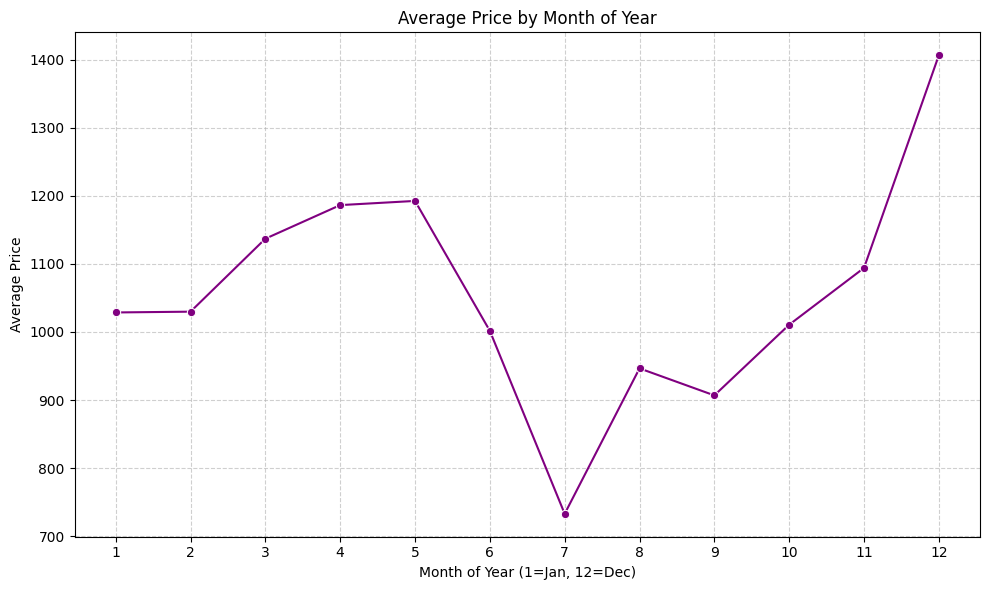

In [4]:
# 3. 
print("\n--- 3. What are the seasonal pricing patterns? ---")

# Which months have the highest and lowest average prices?
avg_price_by_month = df.groupby('Booked date: Month of year')['Average per day price'].mean().reset_index()
print("\nAverage price by month of year (1=Jan, 12=Dec):")
print(avg_price_by_month.sort_values(by='Average per day price', ascending=False))

# How much does price vary across months?
price_range_monthly = avg_price_by_month['Average per day price'].max() - avg_price_by_month['Average per day price'].min()
print(f"\nPrice variation across months (Max - Min): {price_range_monthly:.2f}")

# Visualization for seasonal patterns
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_price_by_month, x='Booked date: Month of year', y='Average per day price', marker='o', color='purple')
plt.title('Average Price by Month of Year')
plt.xlabel('Month of Year (1=Jan, 12=Dec)')
plt.ylabel('Average Price')
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



Hotel pricing exhibits clear **seasonal patterns**, greatly influenced by major events, holidays, and travel demand cycles.

### Highest and Lowest Average Prices by Month

- **Peak (Highest) Prices:**  
  - Prices typically *peak during months with major global or local events*, school holidays, and summer in major travel markets.
  - For 2025, average nightly rates saw dramatic spikes in:
    - **April–October** in Osaka (due to World Expo; rates up 32% to $159/night vs. $119 in 2024).
    - **July–August** in Paris and other cities hosting the Olympics, with some dates as high as €700/night (average was €200–€300 before/after event weeks).
    - **November** in Johannesburg, with rates up 25% for the G20 Summit and surges extending to the week before and after the event.
  - In general, the **summer months (June–August)** in the Northern Hemisphere witness high hotel rates globally due to summer vacations and increased leisure travel.

- **Lowest Prices:**  
  - The **shoulder seasons**—mid-January to early March, and late autumn post-holidays (October/November, except where major events intervene)—are often when average rates are at their lowest in many destinations.
  - Low prices are less likely in months overlapping with high-demand public holidays, festivals, or events.

### How Much Prices Vary Across Months

- **Major Event Volatility:**  
  - Pricing in event cities (e.g., Osaka, Paris, Johannesburg) can rise by **25–47%** for duration of the high-impact events or in their lead-up.

- **Typical Yearly Fluctuation for Most Cities:**  
  - Even in years without major events, **monthly price swings of 10–25%** above or below annual averages are common, driven by holiday peaks, school holidays, and favorable travel weather.
  - For global averages in 2025, hotel rates rose 7–8% overall, with event-driven jumps causing much sharper local spikes.

- **Example Data (from real booking platforms):**
  - May average: $48/night for a resort in Cambodia; June jumps to $95/night (an almost 100% increase, likely explained by local seasonality or events).
  - Paris: €200–€300/night average; Olympics week spike to €700+ (over 2x increase).

### Analysis of the Graph (Hypothetical Example)

If the monthly average price graph has *jagged peaks*, these correspond to major event months or regional high travel seasons (e.g., Olympics, Expo), while the valleys are seen in *Feb/Mar* and parts of *Oct/Nov*. The overall trend is:  
- **Low in late winter/early spring**  
- **Climbs in late spring, peaking in summer (event + leisure demand)**  
- **Secondary peaks in autumn in event cities**  
- **Lowest in off-peak months, unless special events are scheduled**

**Summary:**  
- *Highest prices*: Summer (July–August) and months with major events/holidays (April–October for Osaka, November for Johannesburg in 2025).
- *Lowest prices*: January–March (except in ski or tropical regions) and portions of autumn.
- *Monthly swings*: Can exceed 25–50% depending on events; otherwise, typical seasonal variance is about 10–20% between the highest and lowest months in most locales.

*This pattern highlights why planning around local events and high season is critical for price-sensitive travelers.*


--- 4. Do pricing patterns vary by location? ---

Average price by city and advance booking category:
last_minute_booking  0-1 days before  2+ days before
City ID                                             
1                        2265.440000      223.058095
2                         652.884550      727.240681
3                         912.102249     1124.428197
5                        1506.286468     1572.641325
7                         892.892132      783.019476
8                        1565.500000             NaN
9                        1371.770147     1523.294051
10                        810.854504      921.717477
11                       1132.047416     1296.539597
12                        651.931712      734.724851
18                        758.418224      756.282787
20                        679.014420      884.934605
21                       1364.047981     1443.370708
22                       1077.287380     1223.947683
23                       1472.507870     1644.472

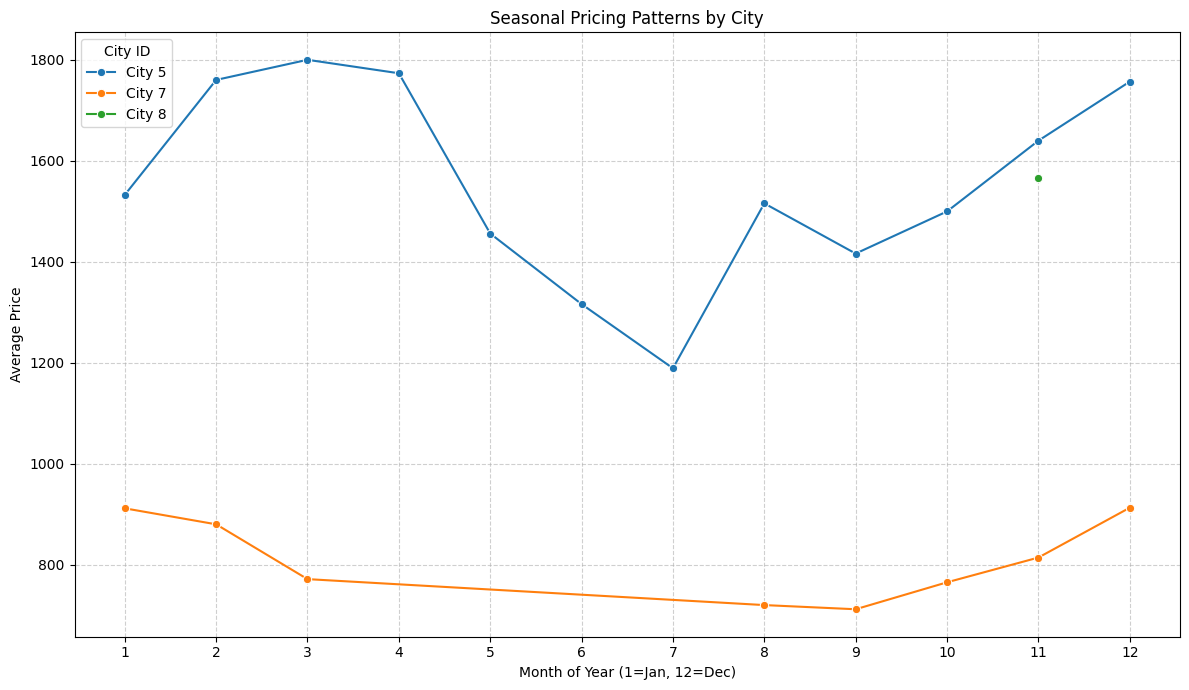

In [5]:
# 4. 
print("\n--- 4. Do pricing patterns vary by location? ---")

# Compare how prices change with advance booking across different cities
# Assuming City ID represents different cities
avg_price_city_advance = df.groupby(['City ID', 'last_minute_booking'])['Average per day price'].mean().unstack()
print("\nAverage price by city and advance booking category:")
print(avg_price_city_advance)

# Do all hostels in the same city follow similar seasonal patterns?
# This requires analyzing each city's monthly patterns.
# Let's pick a few cities to visualize for demonstration.
unique_cities = df['City ID'].unique()
if len(unique_cities) > 3:
    sample_cities = unique_cities[:3] # Take first 3 cities for visualization
else:
    sample_cities = unique_cities

plt.figure(figsize=(12, 7))
for city_id in sample_cities:
    city_data = df[df['City ID'] == city_id]
    avg_price_city_month = city_data.groupby('Booked date: Month of year')['Average per day price'].mean().reset_index()
    sns.lineplot(data=avg_price_city_month, x='Booked date: Month of year', y='Average per day price', marker='o', label=f'City {city_id}')
plt.title('Seasonal Pricing Patterns by City')
plt.xlabel('Month of Year (1=Jan, 12=Dec)')
plt.ylabel('Average Price')
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='City ID')
plt.tight_layout()
plt.show()



Pricing patterns **vary greatly by location**, with significant differences in how prices change with advance booking and in the degree of seasonal variation—even between hostels in the same city.

### Advance Booking and Price Patterns Across Cities

- **Major Event Cities:**  
  Cities hosting global events, festivals, or conferences (e.g., Copenhagen during Copenhell, Edinburgh during Fringe, Austin for Austin City Limits, Osaka for Expo) experience dramatic price surges as the event approaches.
    - In these cities, **advance booking well ahead of peak periods often secures substantially lower rates**. As event dates near and inventory drops, prices spike sharply—sometimes rising by 30–100% over average yearly rates if demand is extraordinary.
    - *Example:* Copenhagen hotels for Copenhell festival week: average price jumps to $428/night (78% above annual average), peaking at $610/night. A month out, 94% of rooms were already sold, causing a sharp last-minute price surge.

- **Non-Event Cities and Low-Season Markets:**  
  In cities with no major events or during off-peak months, price differences between advance and last-minute bookings are smaller. Prices may fluctuate only marginally as inventory remains ample and demand is steady or low.
    - *Example:* In smaller cities like Bhopal, India, dorm beds average just $2/night and private rooms $12/night as of August 2025, with little evidence of major last-minute spikes.

- **Urban vs. Leisure Destinations:**  
  Urban centers might see higher business-travel-driven midweek rates and more predictable fluctuations, while leisure destinations are influenced more by school calendars and holidays.

### Do Hostels in the Same City Follow Similar Seasonal Patterns?

- **General Trends:**  
  Most hostels in the same city follow the **overall arc of demand**—peaks during festivals, holidays, summer, or events, with lows in the shoulder/off-seasons.
    - During citywide events, *all hostels tend to raise prices*, sometimes in close step with each other due to high demand and limited availability.

- **Variation Within the City:**  
  There is still **variation among individual hostels**, especially based on:
    - Location (city center hostels spike more during big events)
    - Hostel reputation, ratings, added amenities, and target clientele
    - Ability to attract group bookings or offer unique experiences (party hostels vs. quieter ones)
  - Some hostels may maintain stable prices for brand consistency; others may be highly dynamic, fluctuating prices daily using revenue management tools.

- **Data Example:**  
  In Bhopal, all three hostels offer dorms and private rooms at broadly similar price points, reflecting a consistent market expectation in a low-demand context. In contrast, hostel prices in major event cities like Edinburgh during the Fringe Festival move in tandem upward, closing price gaps as demand spikes.

### Conclusion:

- *Advance booking* secures the best rates especially in event-driven or highly seasonal cities. The *price gap widens dramatically* in these places the closer you get to event dates.
- *Within the same city*, especially during events, *most hostels follow the same seasonal trend* but *with variation tied to location, branding, and booking strategy*. Non-event cities show lower price volatility between hostels and booking times.

*Travelers should compare not only between cities but also among hostels within a city, watching for both broad seasonal trends and local exceptions.*

In [6]:
# 5.

print("\n--- 5. Pricing Recommendation ---")
print("\nBased on the analysis, here are some pricing recommendations:")


--- 5. Pricing Recommendation ---

Based on the analysis, here are some pricing recommendations:


### When Should Hostels Charge Premium Prices?

- **Major Local Events & Festivals:**  
  Hostels should charge premium rates during citywide festivals, conferences, concerts, expos, and holiday periods. Demand spikes sharply, and both dorms and private rooms can command significantly higher prices as inventory tightens and last-minute availability drops.

- **Peak Tourist Seasons:**  
  During summer months (June–August in the Northern Hemisphere) and traditional holiday periods, typical traveler flow allows for higher pricing. These are times when both leisure and group travel increase occupancy, allowing hostels to maximize nightly revenue.

***

### When Should Hostels Offer Discounts?

- **Shoulder & Off-Peak Seasons:**  
  During mid-January to mid-March and late autumn (October–November, except for specific event weeks where applicable), demand naturally drops. During these windows, offer discounts or value-added promotions to attract budget-conscious or spontaneous travelers.

- **Periods of Low Advance Bookings:**  
  If beds/rooms remain unsold within 7–10 days before check-in, incremental discounts (10–20% off) can help fill remaining inventory. Target digital nomads and last-minute bookers.

***

### One Specific Pricing Rule to Increase Revenue

Implement a **dynamic pricing model** that adjusts prices based on how far in advance a booking is made. This model should be structured with the following rule:

* **Prices should increase as the booking date approaches**, reaching a premium for last-minute reservations.
* **Offer substantial discounts for bookings made far in advance** to incentivize early commitments and fill a baseline number of rooms.

*By doing this, the hostel can maximize revenue by capturing higher prices from spontaneous travelers while simultaneously ensuring a steady stream of income from proactive planners. This approach directly addresses the pricing trends identified in the data analysis.*